# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## My Hypothesis 

The applicants that are more likely to get a loan would be those who:

Have existing loans already

Applicants with a credit history above a certain threshold

Who have equity

Who have a good debt to credit ratio

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
# me - I got this by df.isnull().sum()  and by df.info and also df.describe()

Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### I have to split into training and testing first as I found myself getting swayed by the types of features I wanted to engineer by looking at all of the data, for instance I was noticing that for a certain band of income i.e. under an  Applicant income of 6000 there were alot of Y loan statuses, and I wanted to created a feature out of this. But this is not  right so I am splitting. There are alot of other reasons I put in the Everything notebook.


In [3]:
# Setting the X data and the target variable

X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df[['Loan_Status']]

In [4]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55) # 70% training and 30% test

In [5]:
#me
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Ok so why is the Dependents column an object type?
If you look at the data below you can see that for instances where there are 3 or more children '3+' is used.

So I asked Max how he would treat this feature (especially when it comes to scaling) He said it is best to treat it as categorical, becuase you don't want to leave it as numerical it could grow as you don't want someone with 1000 dependents and you can't have someone with 3.33 dependents. He also said that it is discrete that is why you can't have 1.5 dependents.

This is what I was explaining to Behrooz when I told him that the number of children feature should be categorical and you should create dummies from it.

The other things I spoke to Max About:
I asked him about when the data is unbalanced - he said this is a common thing that data scientist face and that there are many things you can do including resampling, he sent 2 links to read which he suggested spend as much time on it as you can because you could be asked this question in interviews.

So if a feature is imbalanced this would mean there would be more than one type of value in the column, so he said you can just drop this feature. 

But if the target is imbalanced there are a few things you can do and the thing to bear in mind is that sometimes they will work and others they wont, you just have to try:

1. If you have Big Data then you can Under Sample based on the minority class (1:10) (so the notion here is that you have shit loads of data and even if you undersample you would still get plenty data)

2. Over Sample - A lot of data points but much smaller so you would have to duplicate rows, but you are not adding anything new, it is just repeated data and it doesn't add value.

3. The other strategies Use Machine Learning: they create Surrogates with knowledge of existing datapoints but the disadvantage is that if the model is not good at predicting you would just be introducing noise into the data. Examples of algorithms used in this method is SMOTE and KNN.

4. But from his personal experience he uses Advanced Machine Learning Models that have built in sampling methods like Deep Neural Networks

All of the above is for the target variable.

I also asked him about using something similar to imputing the missing values for features by using instances (rows) that had complete data across all attributes. He said there is something called KNN imputation but it is slow so there is something called MICE as well.


https://pypi.org/project/imbalanced-learn/

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets


In [6]:
# I have to convert y_train to values as I was getting an error later on

y_train.value_counts()

Loan_Status
Y              298
N              131
dtype: int64

In [7]:
y_train.head()

,Loan_Status
424,Y
66,N
476,Y
591,N
326,Y


In [8]:
y_train['Loan_Status'] = np.where(y_train["Loan_Status"] == 'Y', 1, 0)
y_test['Loan_Status'] = np.where(y_test["Loan_Status"] == 'Y', 1, 0)

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
y_train.head()

,Loan_Status
424,1
66,0
476,1
591,0
326,1


In [10]:
y_test.head()

,Loan_Status
191,0
180,0
422,1
561,1
192,0


In [11]:
X_train.Dependents.value_counts()

0     236
2      75
1      70
3+     39
Name: Dependents, dtype: int64

In [12]:
# checking for missing values:

In [13]:
X_train.isnull().sum()

Gender                9
Married               2
Dependents            9
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       33
Property_Area         0
dtype: int64

In [14]:
X_train.shape

(429, 11)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 424 to 461
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             420 non-null    object 
 1   Married            427 non-null    object 
 2   Dependents         420 non-null    object 
 3   Education          429 non-null    object 
 4   Self_Employed      407 non-null    object 
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         419 non-null    float64
 8   Loan_Amount_Term   417 non-null    float64
 9   Credit_History     396 non-null    float64
 10  Property_Area      429 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 40.2+ KB


In [16]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,429.0,5431.121212,6693.607060,416.0,2895.0,3750.0,5726.0,81000.0
CoapplicantIncome,429.0,1676.025175,3214.755364,0.0,0.0,1131.0,2275.0,41667.0
LoanAmount,419.0,146.112172,84.086162,17.0,100.0,127.0,170.0,700.0
Loan_Amount_Term,417.0,342.129496,62.736265,12.0,360.0,360.0,360.0,480.0
Credit_History,396.0,0.833333,0.373149,0.0,1.0,1.0,1.0,1.0


From this we can see that the Applicant Income is skewed to the left (i.e. I think the tail is on the left hand side because the mean is 5403 and the median is 3812 so that means most of the values are to the right of the median i.e. more counts are to the right and less counts to the left so the tail has to be on the left. 

(A "skewed right" distribution is one in which the tail is on the right side. A "skewed left" distribution is one in which the tail is on the left side.)
https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e6.htm

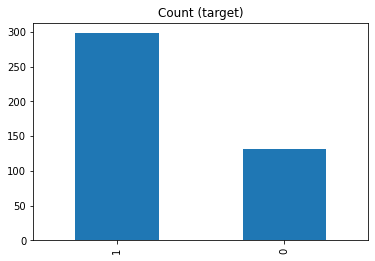

In [17]:
target_count = y_train['Loan_Status'].value_counts()
target_count.plot(kind='bar', title='Count (target)');

So to me this means there is a possibility that the data will be imbalanced when it is split into training and testing so I will have to do something there. Update so I split the data and there is the imbalance still

How many applicants have a Credit_History? (Credit_History has value 1 for those who have a credit history and 0 otherwise)

Ans = 330

In [18]:
X_train.Credit_History.value_counts()

1.0    330
0.0     66
Name: Credit_History, dtype: int64

Is the ApplicantIncome distribution in line with your expectation? Similarly, what about CoapplicantIncome?

I thought they would have been more normally distributed


In [19]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)

https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/ # To change the size of the plot

https://www.delftstack.com/howto/seaborn/seaborn-font-size/ # To change the size of the font

https://seaborn.pydata.org/generated/seaborn.histplot.html



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

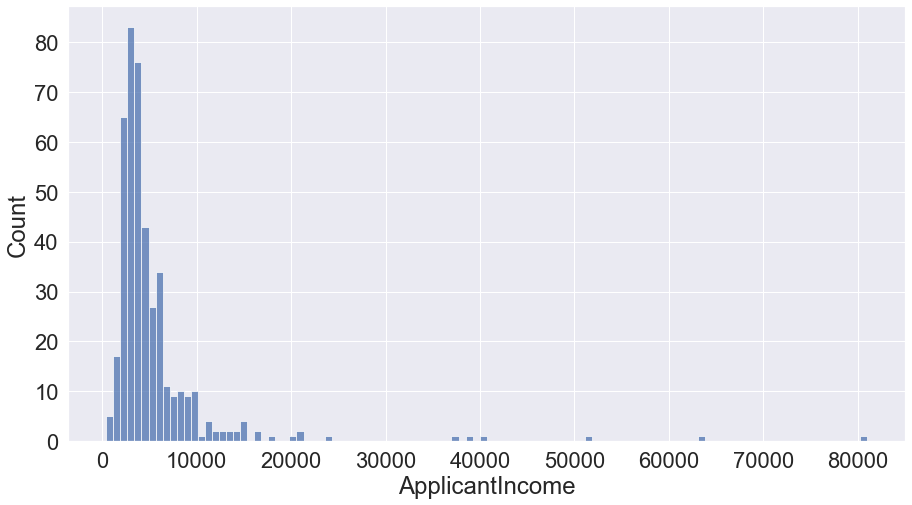

In [20]:
sns.histplot(data=X_train, x="ApplicantIncome")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

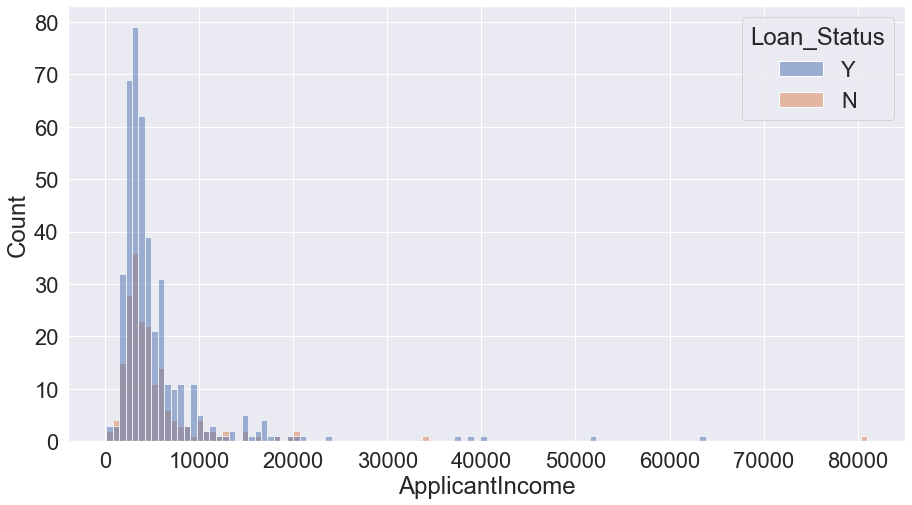

In [21]:
sns.histplot(data=df, x="ApplicantIncome", hue="Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

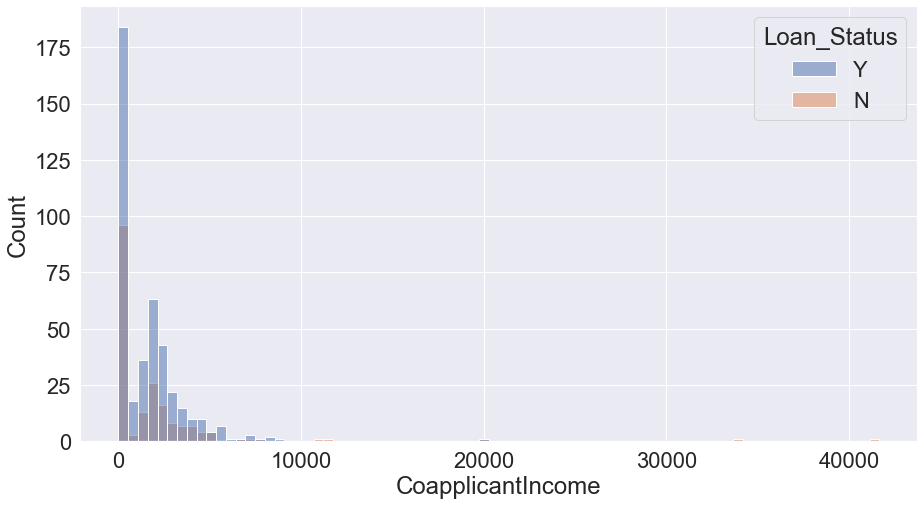

In [22]:
sns.histplot(data=df, x="CoapplicantIncome", hue="Loan_Status")

The above suggests that there is a high correlation with the Loan Application being rejected if the co-Applicant Income
is zero. Put in presentation

In [23]:
#sns.displot(data=df, x="ApplicantIncome")

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

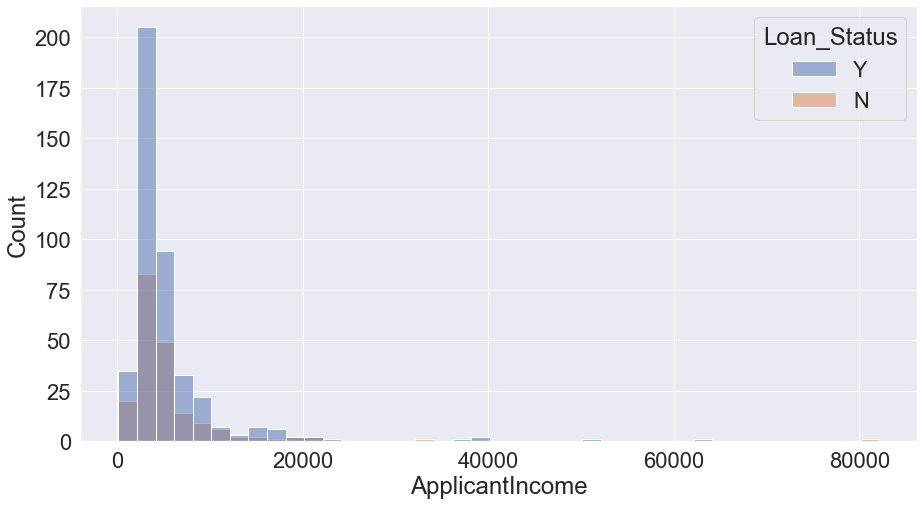

In [24]:
sns.histplot(data=df, x="ApplicantIncome", hue="Loan_Status", binwidth = 2000)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

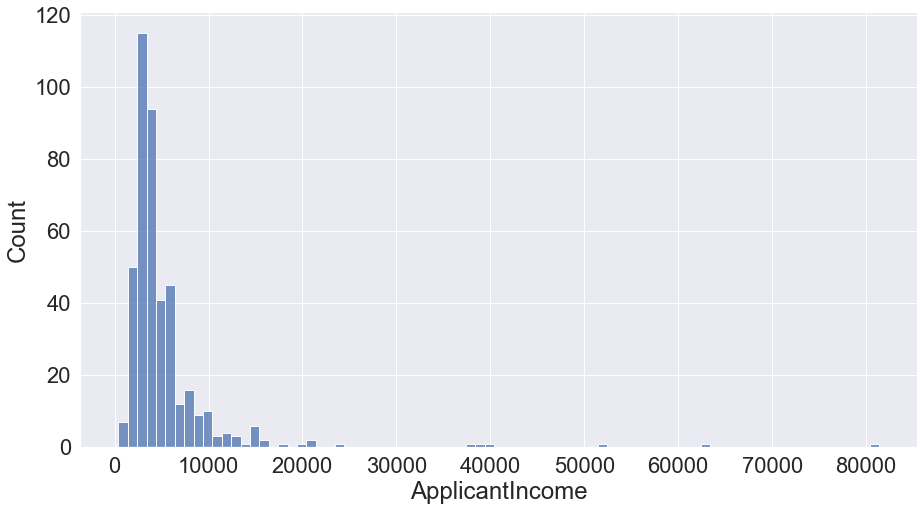

In [25]:
sns.histplot(data=X_train, x="ApplicantIncome", binwidth = 1000)

A boxplot is really used to look at the range and distribution of the data:

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

https://seaborn.pydata.org/generated/seaborn.boxplot.html

I wanted to plot both types of income in one plot but the examples they gave assumed that there was 1 a column that had if either the length being measures was a sepal or petal or 2. The day of the week, that means there are repeated data in the column - not tidy data.

But in the tutorial they showed how to do it for tidy data, so what I'll have to do is to just create a subset of the dataframe
with just the income I am interested in:

Plotting “wide-form” data
While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

In [26]:
X_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
424,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban
66,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban
476,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban


Text(0.5, 1.0, 'Box Plot')

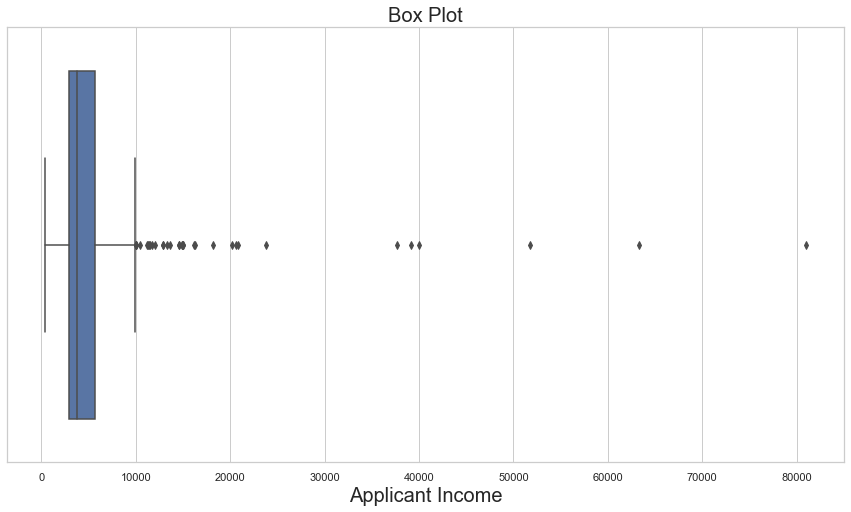

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=X_train["ApplicantIncome"])
ax.set_xlabel("Applicant Income", fontsize = 20)
# ax.set_ylabel("", fontsize = 20)
ax.set_title("Box Plot", fontsize = 20)

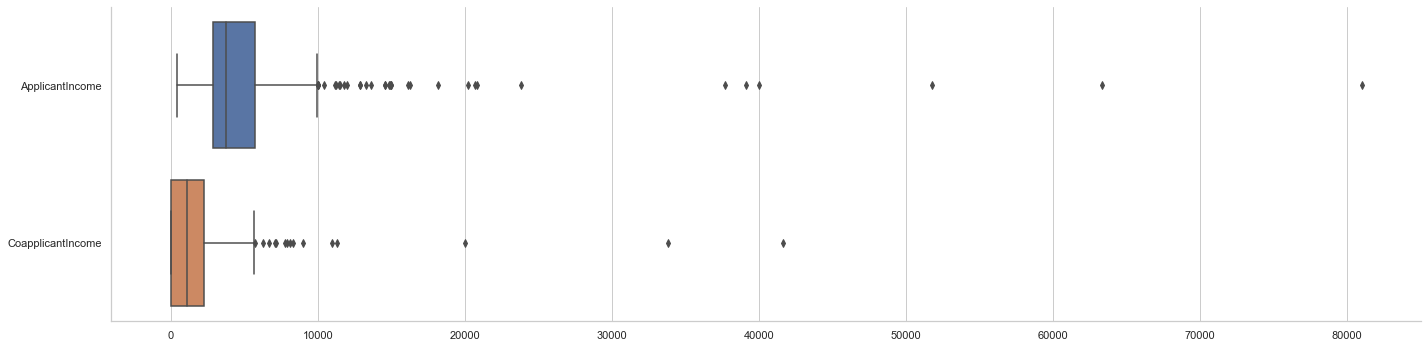

In [28]:
income_subset = X_train[['ApplicantIncome', 'CoapplicantIncome']] 

# income_subset.sample(2)

sns.catplot(data=income_subset, orient="h", kind="box", aspect=4)

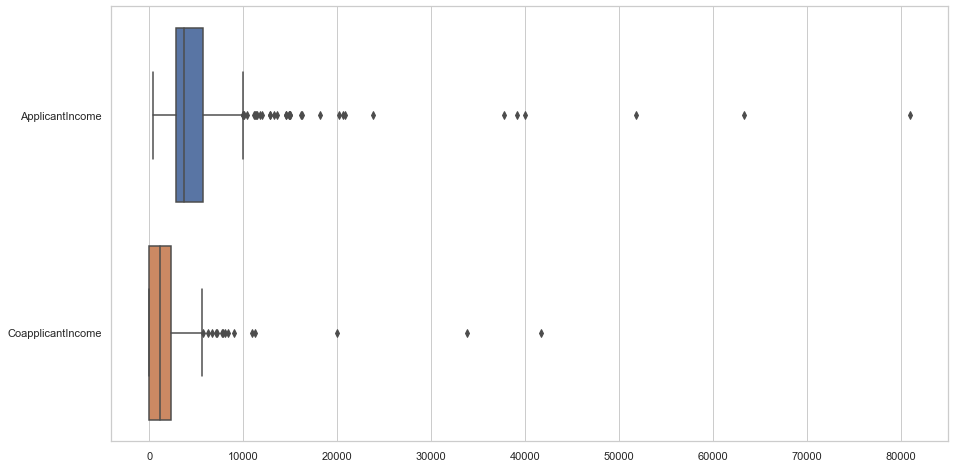

In [29]:
ax = sns.boxplot(data = income_subset, orient = 'h')

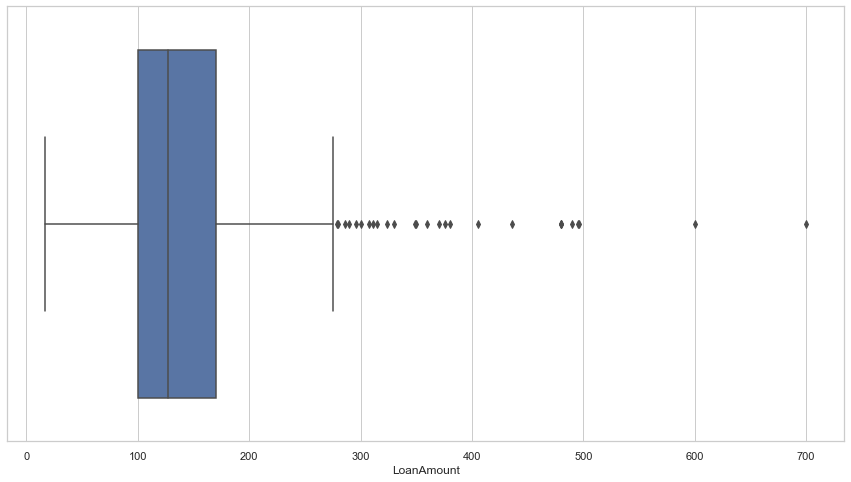

In [30]:
ax = sns.boxplot(x=X_train["LoanAmount"])

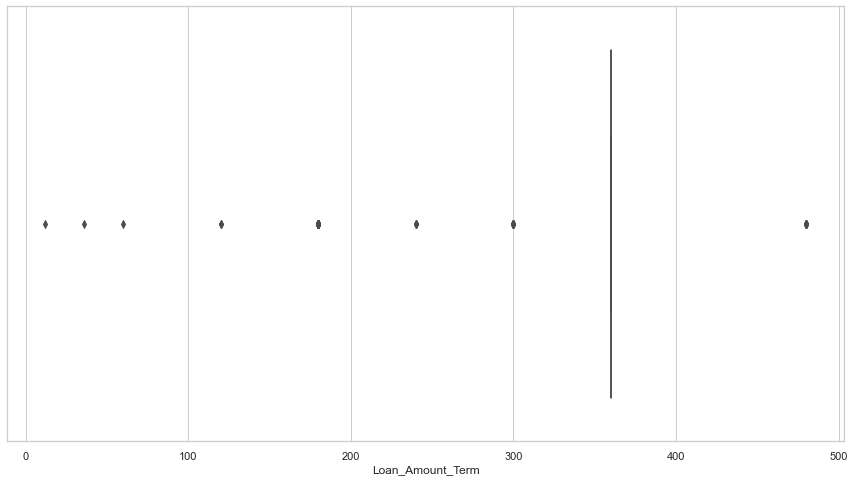

In [31]:
ax = sns.boxplot(x=X_train["Loan_Amount_Term"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

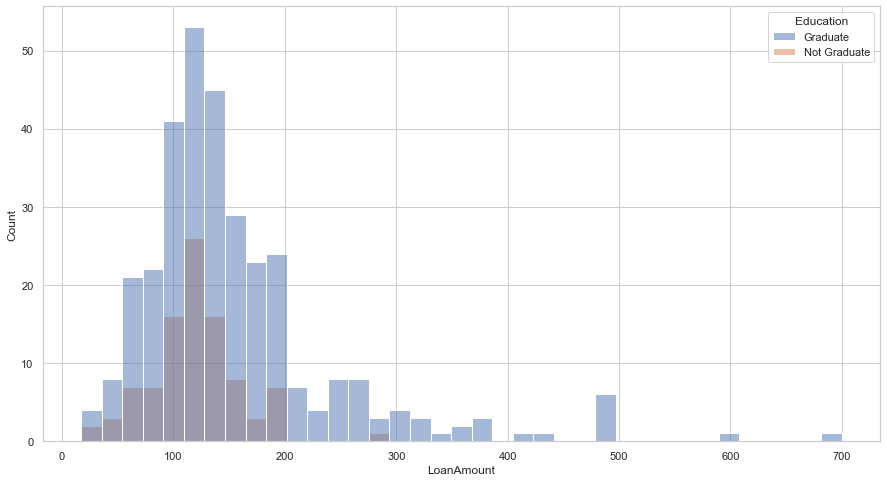

In [32]:
sns.histplot(data=X_train, x="LoanAmount", hue="Education")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

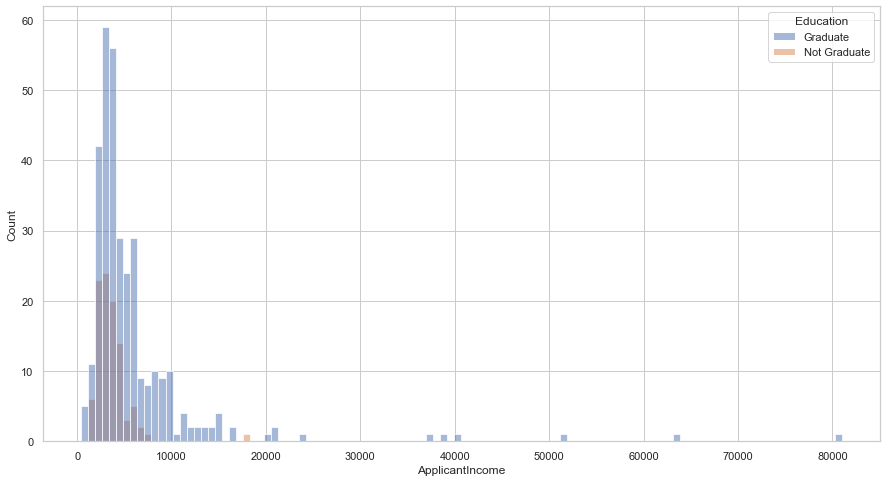

In [33]:
sns.histplot(data=X_train, x="ApplicantIncome", hue="Education")

In [34]:
# income_subset_2.sample(5)

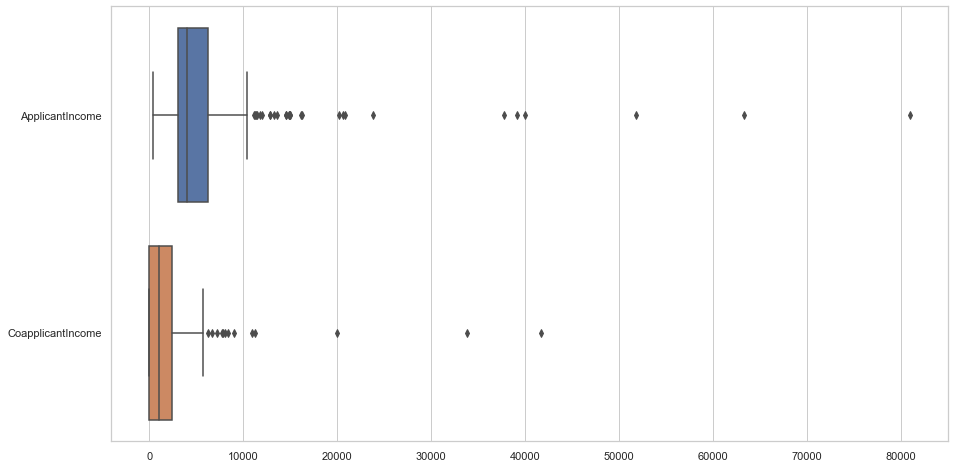

In [35]:
income_subset_2 = X_train[['ApplicantIncome', 'CoapplicantIncome', 'Education' ]] 

# ax = sns.boxplot(data = income_subset_2, orient = 'h', hue = 'Education') # hue was not working without x and y

# g = sns.catplot(x="fare", y="survived", row="class",
#                 kind="box", orient="h", height=1.5, aspect=4,
#                 data=titanic.query("fare > 0"))
# g.set(xscale="log")

ax = sns.boxplot(data = income_subset_2.query("Education == 'Graduate'"), orient = 'h') 


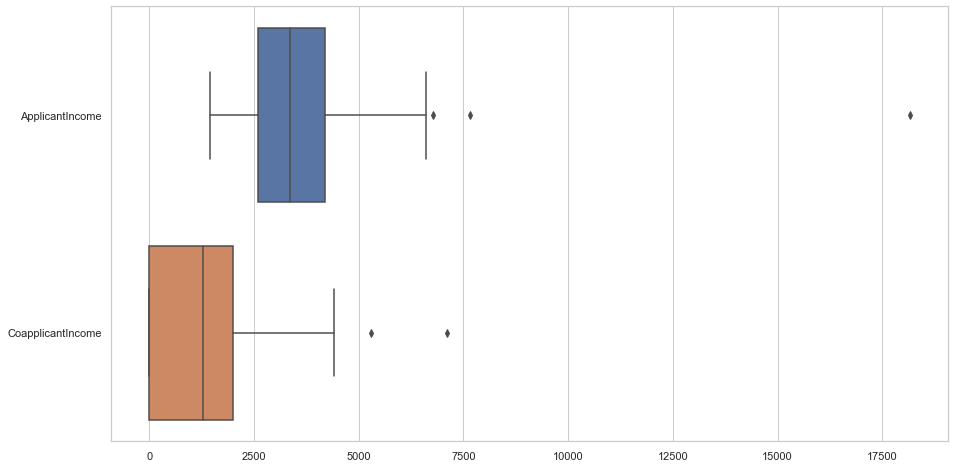

In [36]:
ax = sns.boxplot(data = income_subset_2.query("Education == 'Not Graduate'"), orient = 'h')

To filter a data frame:
https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [37]:
X_train.loc[X_train['ApplicantIncome'] > 60000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [38]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,429.0,5431.121212,6693.607060,416.0,2895.0,3750.0,5726.0,81000.0
CoapplicantIncome,429.0,1676.025175,3214.755364,0.0,0.0,1131.0,2275.0,41667.0
LoanAmount,419.0,146.112172,84.086162,17.0,100.0,127.0,170.0,700.0
Loan_Amount_Term,417.0,342.129496,62.736265,12.0,360.0,360.0,360.0,480.0
Credit_History,396.0,0.833333,0.373149,0.0,1.0,1.0,1.0,1.0


In [39]:
X_train.shape

(429, 11)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 424 to 461
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             420 non-null    object 
 1   Married            427 non-null    object 
 2   Dependents         420 non-null    object 
 3   Education          429 non-null    object 
 4   Self_Employed      407 non-null    object 
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         419 non-null    float64
 8   Loan_Amount_Term   417 non-null    float64
 9   Credit_History     396 non-null    float64
 10  Property_Area      429 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 60.2+ KB


In [41]:
X_train.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [42]:
print(X_train['Gender'].value_counts())
print(X_train['Married'].value_counts())
print(X_train['Dependents'].value_counts())
print(X_train['Education'].value_counts())
print(X_train['Self_Employed'].value_counts())
print(X_train['Credit_History'].value_counts())
print(X_train['Property_Area'].value_counts())


Male      352
Female     68
Name: Gender, dtype: int64
Yes    284
No     143
Name: Married, dtype: int64
0     236
2      75
1      70
3+     39
Name: Dependents, dtype: int64
Graduate        330
Not Graduate     99
Name: Education, dtype: int64
No     356
Yes     51
Name: Self_Employed, dtype: int64
1.0    330
0.0     66
Name: Credit_History, dtype: int64
Semiurban    164
Urban        137
Rural        128
Name: Property_Area, dtype: int64


## Link to KNN imputation:

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [43]:
X_train.isna().sum() # to get the sum of missing values 

Gender                9
Married               2
Dependents            9
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           10
Loan_Amount_Term     12
Credit_History       33
Property_Area         0
dtype: int64

In [44]:
from sklearn.impute import KNNImputer



To get logs of columns

https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

In [45]:
# taking the natural log of the total income and loan amount columns

X_train['total_income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
X_train['total_income_log'] = np.log(X_train['total_income'])

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
X_train['LoanAmount_log'] = np.log(X_train['LoanAmount'])

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
X_train.sample(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income,total_income_log,LoanAmount_log
110,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,5316.0,8.578476,4.912655
256,Male,No,0,Not Graduate,No,6045,0.0,115.0,360.0,0.0,Rural,6045.0,8.706987,4.744932
582,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,3166.0,8.060224,3.583519
459,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,8334.0,9.028099,5.075174


In [49]:
# converting columns to category data types

X_train['Credit_History'] = X_train['Credit_History'].astype('category')

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# creating a new feature if there is a co applicant or not

X_train['Coapplicant_YesNo'] = np.where(X_train["CoapplicantIncome"] > 0, 1, 0)
X_train['Coapplicant_YesNo'].astype('category')

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


424    0
66     1
476    1
591    0
326    0
      ..
347    1
37     1
541    0
295    1
461    0
Name: Coapplicant_YesNo, Length: 429, dtype: category
Categories (2, int64): [0, 1]

In [51]:
# get dummies
X_train = pd.get_dummies(X_train, columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Coapplicant_YesNo' ], drop_first = True)

In [52]:
X_train.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,total_income,total_income_log,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Coapplicant_YesNo_1
567,3400,2500.0,123.0,360.0,5900.0,8.682708,4.812184,1,1,0,0,1,0,0,0,0,0,1
193,3858,0.0,76.0,360.0,3858.0,8.257904,4.330733,1,0,0,0,0,0,0,1,1,0,0
582,3166,0.0,36.0,360.0,3166.0,8.060224,3.583519,0,1,0,0,0,0,0,1,1,0,0
86,3333,2000.0,99.0,360.0,5333.0,8.581669,4.595120,1,1,0,1,0,1,0,0,1,0,1
303,1625,1803.0,96.0,360.0,3428.0,8.139732,4.564348,1,1,1,0,0,0,0,1,0,1,1


In [53]:
X_train.drop(columns= ['ApplicantIncome', 'CoapplicantIncome'], inplace=True, errors='raise')

In [54]:
X_train.sample(5)

,LoanAmount,Loan_Amount_Term,total_income,total_income_log,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Coapplicant_YesNo_1
581,90.0,360.0,35673.0,10.482149,4.499810,1,0,0,0,0,0,0,1,0,1,1
106,225.0,360.0,12543.0,9.436918,5.416100,1,1,0,1,0,0,0,1,0,1,1
480,154.0,360.0,4350.0,8.377931,5.036953,0,0,0,0,0,1,0,1,0,0,0
11,109.0,360.0,4340.0,8.375630,4.691348,1,1,0,1,0,0,0,1,0,1,1
435,NaN,240.0,10047.0,9.215029,NaN,0,0,0,0,0,0,0,1,1,0,0


In [55]:
# min max scaling everything now 
# I could have used standard scaler but I will include it after to see if it makes a difference in the result

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,LoanAmount,Loan_Amount_Term,total_income,total_income_log,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Coapplicant_YesNo_1
0,0.115666,0.743590,0.168908,0.579381,0.465626,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.159590,0.358974,0.050429,0.330233,0.538768,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.311859,0.615385,0.088087,0.438916,0.700635,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.275256,0.487179,0.057292,0.353918,0.669684,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.165447,0.743590,0.043679,0.304504,0.547174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X_train.isna().sum()

LoanAmount                 10
Loan_Amount_Term           12
total_income                0
total_income_log            0
LoanAmount_log             10
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Credit_History_1.0          0
Property_Area_Semiurban     0
Property_Area_Urban         0
Coapplicant_YesNo_1         0
dtype: int64

In [57]:
# Ok see how the number of missing value rows dropped because I dropped the applicant income and co applicant income
# what I could try doing instead is dropping it after I normalised. So that means I will have to calculate the total income at 
# the very last after KNN imputer

In [58]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

In [59]:
X_train.isna().sum()

LoanAmount                 0
Loan_Amount_Term           0
total_income               0
total_income_log           0
LoanAmount_log             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Credit_History_1.0         0
Property_Area_Semiurban    0
Property_Area_Urban        0
Coapplicant_YesNo_1        0
dtype: int64

In [60]:
print(X_train.shape)
print(y_train.shape)

(429, 16)
(429, 1)


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## converting X_test through the same process

In [61]:
X_test.shape

(185, 11)

In [62]:
X_test.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
269,Female,No,1,Graduate,No,2876,1560.0,90.0,360.0,1.0,Urban
414,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
520,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban
181,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural


In [63]:
X_test['total_income'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']
X_test['total_income_log'] = np.log(X_test['total_income'])
X_test['LoanAmount_log'] = np.log(X_test['LoanAmount'])
X_test['Credit_History'] = X_test['Credit_History'].astype('category')
X_test['Coapplicant_YesNo'] = np.where(X_test["CoapplicantIncome"] > 0, 1, 0)
X_test['Coapplicant_YesNo'].astype('category')
X_test = pd.get_dummies(X_test, columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Coapplicant_YesNo' ], drop_first = True)
X_test.drop(columns= ['ApplicantIncome', 'CoapplicantIncome'], inplace=True, errors='raise')

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # no fitting with test data
X_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns) # no fitting with test data


C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [64]:
X_test.isna().sum()

LoanAmount                 0
Loan_Amount_Term           0
total_income               0
total_income_log           0
LoanAmount_log             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Credit_History_1.0         0
Property_Area_Semiurban    0
Property_Area_Urban        0
Coapplicant_YesNo_1        0
dtype: int64

In [65]:
print(X_test.shape)
print(y_test.shape)


(185, 16)
(185, 1)


## 4. Building a Predictive Model

Try paramater grid search to improve the results

In [66]:
# using Zain's code first

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier
   
    Parameters
    ----------
    model: sklearn classifier model
        The sklearn model
    X_train: numpy.ndarray        
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set    
    X_test: numpy.ndarray        
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set    
    num_trees: int
        The value for `n_estimators` argument of RandomForestClassifier
    Returns
    -------
        None
        Shows the number of trees vs error rate plot
            
    """    
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestClassifier(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    plt.semilogx(num_trees,train_err,label="train");
    plt.semilogx(num_trees,test_err,label="test");
    plt.legend();
    plt.xlabel('number of trees');
    plt.ylabel('error rate');

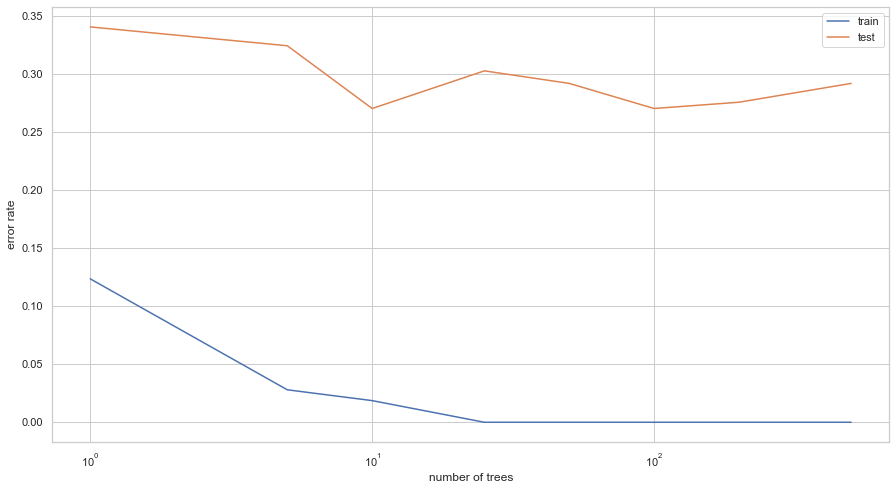

In [69]:
make_num_tree_plot(X_train, np.ravel(y_train), X_test, np.ravel(y_test), (1,5,10,25,50,100,200,500))

# me  Running a Randomized Search first to narrow down the paramaters for Grid Search
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [71]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200]}


In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 23, 45, 67, 89, 111,
                                                         133, 155, 177, 200]},
                   random_state=42, verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [74]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 25, 30 , 35],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [20, 21, 22, 23, 24, 25]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [75]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 25,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 21}

In [76]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [77]:
# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X_test, y_test)

In [78]:
grid_search.best_score_

0.21928225198713633

In [79]:
grid_search.score(X_test, y_test)

0.04305298907909194

In [80]:
y_train

,Loan_Status
424,1
66,0
476,1
591,0
326,1
...,...
347,1
37,1
541,0
295,1


In [85]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [82]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [89]:
logr.score(X_train, y_train) 

0.7832167832167832

In [83]:
logr.score(X_test, y_test)

0.7405405405405405

In [86]:
cv_score_ridge = cross_val_score(logr, X_train, y_train, cv=5)
cv_score_ridge

C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\envs\Working\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

array([0.77906977, 0.81395349, 0.80232558, 0.79069767, 0.71764706])

In [87]:
print(f"Average logr cross-validation score = {np.mean(cv_score_ridge):.2f}")

Average logr cross-validation score = 0.78


In [88]:
print("Model weights: %s"%(logr.coef_)) # these are weights
print("Model intercept: %s"%(logr.intercept_)) # this is the bias term
data = {'features': X_train.columns, 'coefficients':logr.coef_[0]}
pd.DataFrame(data)
pd.DataFrame(data).sort_values(by=['coefficients'], axis=0, ascending=False)

Model weights: [[-0.29727374 -0.76286596 -0.05021862  0.47887049 -0.68738936 -0.09002156
   0.38781268  0.1308248   0.18191477 -0.11815828 -0.37051025 -0.48294905
   2.22174537  0.75368102  0.22153334  0.46681347]]
Model intercept: [-0.62235534]


,features,coefficients
12,Credit_History_1.0,2.221745
13,Property_Area_Semiurban,0.753681
3,total_income_log,0.478870
15,Coapplicant_YesNo_1,0.466813
6,Married_Yes,0.387813
14,Property_Area_Urban,0.221533
8,Dependents_2,0.181915
7,Dependents_1,0.130825
2,total_income,-0.050219
5,Gender_Male,-0.090022


In [ ]:
to figure out:
    how to plot the confusion matrix and get the different metrics of classification
    How to 

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python